## Personas

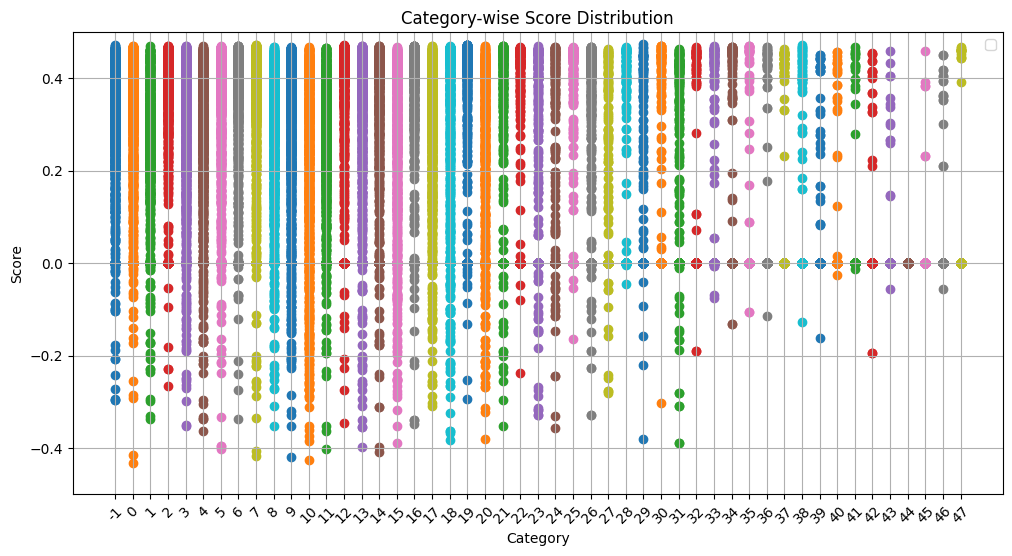

In [ ]:
import os
import json
import matplotlib.pyplot as plt

# JSON 파일이 있는 디렉토리 경로
json_directory = '/content/drive/MyDrive/dataset/personas/'

# 카테고리별 점수 저장을 위한 딕셔너리 초기화
category_scores = {}

# 디렉토리 내의 모든 JSON 파일에 대해 반복
for filename in os.listdir(json_directory):
    if filename.endswith('.json'):
        file_path = os.path.join(json_directory, filename)

        # JSON 파일 열기
        with open(file_path, 'r', encoding='utf-8') as json_file:
            data = json.load(json_file)

            # 'profile' 딕셔너리 순회
            for category, (score, count) in data['profile'].items():
                if category not in category_scores:
                    category_scores[category] = {'scores': [], 'counts': []}

                # 점수와 개수 저장
                category_scores[category]['scores'].append(score)
                category_scores[category]['counts'].append(count)

# 그래프 그리기
plt.figure(figsize=(12, 6))

for category, scores_data in category_scores.items():
    scores = scores_data['scores']
    counts = scores_data['counts']

    # 레이블을 빈 문자열로 설정하여 표시하지 않음
    plt.scatter([category] * len(scores), scores, label='')

# x축 눈금 레이블 비활성화
plt.xticks(rotation=45)

plt.ylim(-0.5, 0.5)  # y축 범위 설정
plt.xlabel('Category')
plt.ylabel('Score')
plt.legend()
plt.title('Category-wise Score Distribution')
plt.grid(True)

# 그래프 표시
plt.show()


## Matching Satisfaction

Error decoding JSON in file: /content/drive/MyDrive/dataset/matching_stf/793.json
Error decoding JSON in file: /content/drive/MyDrive/dataset/matching_stf/311.json
Error decoding JSON in file: /content/drive/MyDrive/dataset/matching_stf/256.json


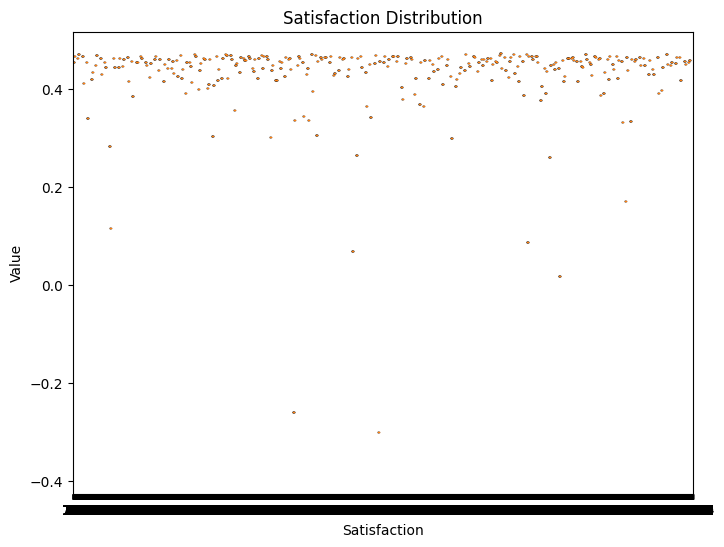

In [ ]:
import os
import json
import matplotlib.pyplot as plt

# JSON 파일이 있는 폴더 경로
folder_path = '/content/drive/MyDrive/dataset/matching_stf/'

# 'matching satisfaction' 값을 저장할 리스트
satisfaction_values = []

# 폴더 내의 모든 JSON 파일 순회
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as json_file:
            try:
                data = json.load(json_file)
                if 'matching satisfaction' in data and data['matching satisfaction']:
                    satisfaction_values.extend(data['matching satisfaction'].values())
            except json.JSONDecodeError:
                print(f"Error decoding JSON in file: {file_path}")

# Box plot 그리기
plt.figure(figsize=(8, 6))
plt.boxplot(satisfaction_values)
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Value')
plt.show()


## Embedded Profiles

<ipython-input-25-d79693bedae4>:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(modified_vectors_2d[:, 0], modified_vectors_2d[:, 1], marker='o', cmap='viridis')
<ipython-input-25-d79693bedae4>:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedded_vectors_2d[:, 0], embedded_vectors_2d[:, 1], marker='o', cmap='viridis')


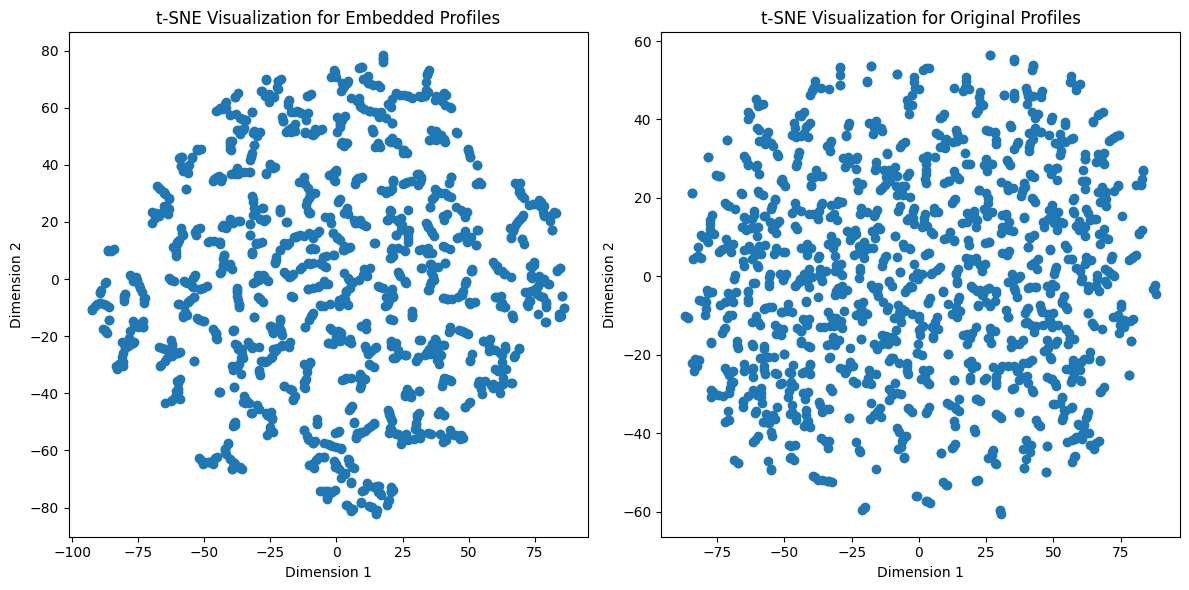

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Function to load and process the data
def load_and_process_data(json_file_path):
    with open(json_file_path, 'r') as json_file:
        data = json.load(json_file)

    vectors = []
    for id, vector_list in data.items():
        vector_array = np.array(vector_list)
        vectors.append(vector_array)

    return np.array(vectors)

# Load the embedded profiles
embedded_vectors = load_and_process_data('/content/drive/MyDrive/dataset/embedded_profiles.json')

# Load the modified profiles
modified_vectors = load_and_process_data('/content/drive/MyDrive/dataset/modified_profiles.json')

# t-SNE for embedded profiles
tsne_embedded = TSNE(n_components=2, perplexity=5, random_state=42)
embedded_vectors_2d = tsne_embedded.fit_transform(embedded_vectors)

# t-SNE for modified profiles
tsne_modified = TSNE(n_components=2, perplexity=5, random_state=42)
modified_vectors_2d = tsne_modified.fit_transform(modified_vectors)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.scatter(modified_vectors_2d[:, 0], modified_vectors_2d[:, 1], marker='o', cmap='viridis')
plt.title('t-SNE Visualization for Original Profiles')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.subplot(1, 2, 1)
plt.scatter(embedded_vectors_2d[:, 0], embedded_vectors_2d[:, 1], marker='o', cmap='viridis')
plt.title('t-SNE Visualization for Embedded Profiles')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.tight_layout()
plt.show()


### anchor, pos, neg plot

In [2]:
import os
import json
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

In [3]:
stf_path = '/content/drive/MyDrive/dataset/matching_stf'

In [4]:
def triplet_index(target_id):
    anchor_id = target_id
    positive_id = []
    negative_id = []

    with open(os.path.join(stf_path, anchor_id + '.json'), 'r', encoding='utf-8') as input_file:
        data = json.load(input_file)

    matching_stf_values = data["matching satisfaction"]

    # 전체 밸류값에서 평균을 빼줍니다.
    matching_stf_avg = sum(matching_stf_values.values()) / len(matching_stf_values)

    for key, value in matching_stf_values.items():
        result = value - matching_stf_avg
        if result > 0:
            positive_id.append(key)
        elif result < 0:
            negative_id.append(key)

    return positive_id, negative_id

In [5]:
with open('/content/drive/MyDrive/dataset/modified_profiles.json', 'r') as json_file:
    modified_dict = json.load(json_file)

with open('/content/drive/MyDrive/dataset/embedded_profiles.json', 'r') as json_file:
    embedded_dict = json.load(json_file)

In [ ]:
target_id = '232'

anc_mod = [modified_dict[target_id]]
anc_emb = [embedded_dict[target_id]]

pos, neg = triplet_index(target_id)
pos_mod = [modified_dict[p] for p in pos]
neg_mod = [modified_dict[n] for n in neg]
pos_emb = [embedded_dict[p] for p in pos]
neg_emb = [embedded_dict[n] for n in neg]

In [ ]:
tsne_embedded = TSNE(n_components=2, perplexity=5, random_state=42)
emb_vec = tsne_embedded.fit_transform(np.array(anc_emb+pos_emb+neg_emb))

# t-SNE for modified profiles
tsne_modified = TSNE(n_components=2, perplexity=5, random_state=42)
mod_vec = tsne_modified.fit_transform(np.array(anc_mod+pos_mod+neg_mod))

# Plotting
fig, axs = plt.subplots(1,2, figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax1.scatter(mod_vec[0, 0], mod_vec[0, 1], marker='o', c='green', label = 'anchor')
ax1.scatter(mod_vec[1:len(pos)+1, 0], mod_vec[1:len(pos)+1, 1], marker='o', c='blue', label = 'positive')
ax1.scatter(mod_vec[len(pos)+1:len(pos+neg)+1, 0], mod_vec[len(pos)+1:len(pos+neg)+1, 1], marker='o', c='red', label = 'negative')
ax1.set_title('t-SNE Visualization for Original Profiles')
ax1.set_xlabel('Dimension 1')
ax1.set_ylabel('Dimension 2')
ax1.legend()

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(emb_vec[0, 0], emb_vec[0, 1], marker='o', c='green', label = 'anchor')
ax2.scatter(emb_vec[1:len(pos)+1, 0], emb_vec[1:len(pos)+1, 1], marker='o', c='blue', label = 'positive')
ax2.scatter(emb_vec[len(pos)+1:len(pos+neg)+1, 0], emb_vec[len(pos)+1:len(pos+neg)+1, 1], marker='o', c='red', label = 'negative')
ax2.set_title('t-SNE Visualization for Embedded Profiles')
ax2.set_xlabel('Dimension 1')
ax2.set_ylabel('Dimension 2')
ax2.legend()

# tsne_embedded = TSNE(n_components=3, perplexity=5, random_state=42)
# emb_vec = tsne_embedded.fit_transform(np.array(anc_emb+pos_emb+neg_emb))

# # t-SNE for modified profiles
# tsne_modified = TSNE(n_components=3, perplexity=5, random_state=42)
# mod_vec = tsne_modified.fit_transform(np.array(anc_mod+pos_mod+neg_mod))

# ax3 = fig.add_subplot(2, 2, 3, projection='3d')
# ax3.scatter(emb_vec[0, 0], emb_vec[0, 1], emb_vec[0, 2], marker='*', c='green', label='anchor')
# ax3.scatter(emb_vec[1:len(pos) + 1, 0], emb_vec[1:len(pos) + 1, 1], emb_vec[1:len(pos) + 1, 2], marker='o', c='blue', label='positive')
# ax3.scatter(emb_vec[len(pos) + 1:len(pos + neg) + 1, 0], emb_vec[len(pos) + 1:len(pos + neg) + 1, 1], emb_vec[len(pos) + 1:len(pos + neg) + 1, 2], marker='o', c='red', label='negative')
# ax3.set_title('t-SNE Visualization for Embedded Profiles')
# ax3.set_xlabel('Dimension 1')
# ax3.set_ylabel('Dimension 2')
# ax3.set_zlabel('Dimension 3')
# ax3.legend()

# ax4 = fig.add_subplot(2, 2, 4, projection='3d')
# ax4.scatter(mod_vec[0, 0], mod_vec[0, 1], mod_vec[0, 2], marker='*', c='green', label='anchor')
# ax4.scatter(mod_vec[1:len(pos) + 1, 0], mod_vec[1:len(pos) + 1, 1], mod_vec[1:len(pos) + 1, 2], marker='o', c='blue', label='positive')
# ax4.scatter(mod_vec[len(pos) + 1:len(pos + neg) + 1, 0], mod_vec[len(pos) + 1:len(pos + neg) + 1, 1], mod_vec[len(pos) + 1:len(pos + neg) + 1, 2], marker='o', c='red', label='negative')
# ax4.set_title('t-SNE Visualization for Modified Profiles')
# ax4.set_xlabel('Dimension 1')
# ax4.set_ylabel('Dimension 2')
# ax4.set_zlabel('Dimension 3')
# ax4.legend()

plt.xticks(None)

plt.tight_layout()
plt.show()

KeyboardInterrupt: ignored

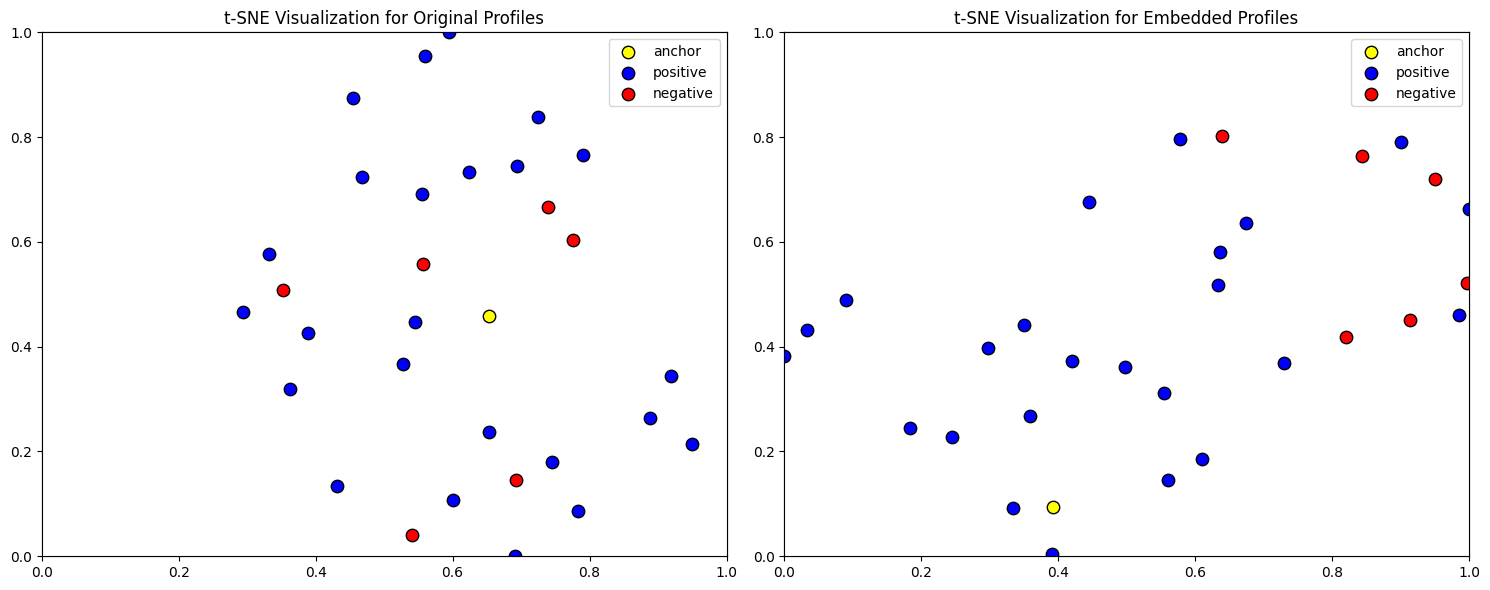

In [44]:

target_id = '157'

anc_mod = [modified_dict[target_id]]
anc_emb = [embedded_dict[target_id]]

pos, neg = triplet_index(target_id)
pos_mod = [modified_dict[p] for p in pos]
neg_mod = [modified_dict[n] for n in neg]
pos_emb = [embedded_dict[p] for p in pos]
neg_emb = [embedded_dict[n] for n in neg]

tsne_embedded = TSNE(n_components=2, perplexity=5, random_state=42)
emb_vec = tsne_embedded.fit_transform(np.array(anc_emb+pos_emb+neg_emb))

# t-SNE for modified profiles
tsne_modified = TSNE(n_components=2, perplexity=5, random_state=42)
mod_vec = tsne_modified.fit_transform(np.array(anc_mod+pos_mod+neg_mod))



# Plotting
fig, axs = plt.subplots(1,2, figsize=(15,6))

ax1 = fig.add_subplot(1,2,1)
ax1.scatter(mod_vec[0, 0], mod_vec[0, 1], marker='o', c='yellow', edgecolor = 'black', s = 80, label = 'anchor')
ax1.scatter(mod_vec[1:len(pos)+1, 0], mod_vec[1:len(pos)+1, 1], marker='o', c='blue', edgecolor = 'black', s = 80, label = 'positive')
ax1.scatter(mod_vec[len(pos)+1:len(pos+neg)+1, 0], mod_vec[len(pos)+1:len(pos+neg)+1, 1], marker='o', c='red', edgecolor = 'black', s = 80, label = 'negative')
ax1.set_title('t-SNE Visualization for Original Profiles')
ax1.set_xlabel('Dimension 1')
ax1.set_ylabel('Dimension 2')
ax1.legend()

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(emb_vec[0, 0], emb_vec[0, 1], marker='o', c='yellow', edgecolor = 'black', s = 80, label = 'anchor')
ax2.scatter(emb_vec[1:len(pos)+1, 0], emb_vec[1:len(pos)+1, 1], marker='o', c='blue', edgecolor = 'black', s = 80, label = 'positive')
ax2.scatter(emb_vec[len(pos)+1:len(pos+neg)+1, 0], emb_vec[len(pos)+1:len(pos+neg)+1, 1], marker='o', c='red', edgecolor = 'black', s = 80, label = 'negative')
ax2.set_title('t-SNE Visualization for Embedded Profiles')
ax2.set_xlabel('Dimension 1')
ax2.set_ylabel('Dimension 2')
ax2.legend()

# Set the same x-axis and y-axis limits for both subplots
min_x = min(mod_vec[:, 0].min(), emb_vec[:, 0].min())
max_x = max(mod_vec[:, 0].max(), emb_vec[:, 0].max())
min_y = min(mod_vec[:, 1].min(), emb_vec[:, 1].min())
max_y = max(mod_vec[:, 1].max(), emb_vec[:, 1].max())

# Adjust the axis limits for both subplots
ax1.set_xlim(min_x, max_x)
ax2.set_xlim(min_x, max_x)
ax1.set_ylim(min_y, max_y)
ax2.set_ylim(min_y, max_y)

# Remove x and y axis labels and ticks
ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/images/TSNE_569.pdf', format='pdf', dpi=300)


In [ ]:
for i in range(1378,1400):
    target_id = str(i)

    anc_mod = [modified_dict[target_id]]
    anc_emb = [embedded_dict[target_id]]

    pos, neg = triplet_index(target_id)
    pos_mod = [modified_dict[p] for p in pos]
    neg_mod = [modified_dict[n] for n in neg]
    pos_emb = [embedded_dict[p] for p in pos]
    neg_emb = [embedded_dict[n] for n in neg]

    tsne_embedded = TSNE(n_components=2, perplexity=5, random_state=42)
    emb_vec = tsne_embedded.fit_transform(np.array(anc_emb+pos_emb+neg_emb))

    # t-SNE for modified profiles
    tsne_modified = TSNE(n_components=2, perplexity=5, random_state=42)
    mod_vec = tsne_modified.fit_transform(np.array(anc_mod+pos_mod+neg_mod))

    # Plotting
    fig, axs = plt.subplots(1,2, figsize=(8,4))

    ax1 = fig.add_subplot(1,2,1)
    ax1.scatter(mod_vec[0, 0], mod_vec[0, 1], marker='o', c='red', label = 'anchor')
    ax1.scatter(mod_vec[1:len(pos)+1, 0], mod_vec[1:len(pos)+1, 1], marker='o', c='blue', label = 'positive')
    ax1.scatter(mod_vec[len(pos)+1:len(pos+neg)+1, 0], mod_vec[len(pos)+1:len(pos+neg)+1, 1], marker='o', c='yellow', label = 'negative')
    ax1.set_title('t-SNE Visualization for Original Profiles')
    ax1.set_xlabel('Dimension 1')
    ax1.set_ylabel('Dimension 2')
    ax1.legend()

    ax2 = fig.add_subplot(1,2,2)
    ax2.scatter(emb_vec[0, 0], emb_vec[0, 1], marker='o', c='red', label = 'anchor')
    ax2.scatter(emb_vec[1:len(pos)+1, 0], emb_vec[1:len(pos)+1, 1], marker='o', c='blue', label = 'positive')
    ax2.scatter(emb_vec[len(pos)+1:len(pos+neg)+1, 0], emb_vec[len(pos)+1:len(pos+neg)+1, 1], marker='o', c='yellow', label = 'negative')
    ax2.set_title('t-SNE Visualization for Embedded Profiles')
    ax2.set_xlabel('Dimension 1')
    ax2.set_ylabel('Dimension 2')
    ax2.legend()

    # Set the same y-axis limits for both subplots
    min_y = min(mod_vec[:, 1].min(), emb_vec[:, 1].min())
    max_y = max(mod_vec[:, 1].max(), emb_vec[:, 1].max())
    ax1.set_ylim(min_y, max_y)
    ax2.set_ylim(min_y, max_y)

    print("target_id: ",i)

    plt.tight_layout()
    plt.show()


KeyError: ignored